<a href="https://colab.research.google.com/github/OlaKozak/CF/blob/master/CF_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt

In [2]:
cd "/content/drive/My Drive/Colab Notebooks/CF_C"

/content/drive/My Drive/Colab Notebooks/CF_C


**Part #2 - Revenue per device analysis (Excel)**

In [0]:
#Importing data
df_task1 = pd.read_csv('task1.csv', parse_dates=['device_install_date'])
df_task1['month'] = pd.DatetimeIndex(df_task1['device_install_date']).month
df_task1.head()

,device_id,device_install_date,country,total_revenue,month
0,FD80F264-5F61-4244-A9C7-5657E38A45A8,2019-08-11,US,3.14,8
1,160B8148-4541-4FEE-97BB-A333EEF3EDAE,2019-08-11,US,10.05,8
2,B470E082-29D9-4FED-BC7A-83906425855C,2019-08-11,US,11.95,8
3,559E65BB-AB4A-4CB2-AB54-60B8C47FCFD8,2019-08-11,US,0.00,8
4,307C26F6-F4BD-4A5B-AF9F-5678EAA29494,2019-08-11,AU,0.00,8


In [0]:
#sorting by total_revenue, 10 highest values come from US
df_task1.sort_values('total_revenue', ascending=False).head(10)

,device_id,device_install_date,country,total_revenue,month
27870,E5B3407C-E440-414F-A63C-C9BDDD415EAD,2019-12-12,US,453.75,12
11440,721EFF7C-85FA-493E-98C2-241D3703CACF,2019-10-13,US,178.79,10
8247,2EA532C9-F8D1-43D2-A8BD-73E939C17596,2019-09-27,US,148.10,9
27925,C0965EFD-096D-4E59-8407-7F9420158B64,2019-12-12,US,124.62,12
35010,EC4B3080-08B9-4F58-A47B-D5BE94081A93,2020-01-07,US,120.00,1
34496,2578199E-8BAE-445C-9E03-D6286A11D111,2020-01-05,US,117.72,1
7807,CECD6914-07D6-4751-AAF8-03AC5BD6490B,2019-09-24,US,106.24,9
22210,A56E4414-E371-4AF5-AE31-812DCD376F30,2019-11-29,US,96.31,11
27714,949BC1C1-5ED0-45DE-8195-C8D2949475AF,2019-12-12,US,90.66,12
19630,F8AD4945-4D55-4147-973B-27104E4E0008,2019-11-22,US,88.98,11


In [0]:
#Calculating Mode for all devices
print (st.mode(df_task1.total_revenue))

0.0


In [0]:
#Mean and std (additionaly min, max and percentiles) for all devices
df_task1.describe()

,total_revenue,month
count,42089.000000,42089.000000
mean,0.344027,8.538122
std,3.664971,3.990929
min,0.000000,1.000000
25%,0.000000,8.000000
50%,0.000000,10.000000
75%,0.000000,11.000000
max,453.750000,12.000000


In [0]:
#94% of all devices didn't bring any revenue
df_task1.total_revenue.value_counts(normalize=True)[0]

0.9407921309605836

Presenting on histogram how right skewed is distibution - majority of deivices (94%) didn't generate any revenue (mode is 0), 
mean is very low (0.344) and is influenced by a few high values up to 453.75 (but I wouldn't call them outliers)  

(array([4.2059e+04, 2.2000e+01, 5.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  0.   ,  45.375,  90.75 , 136.125, 181.5  , 226.875, 272.25 ,
        317.625, 363.   , 408.375, 453.75 ]),
 <a list of 10 Patch objects>)

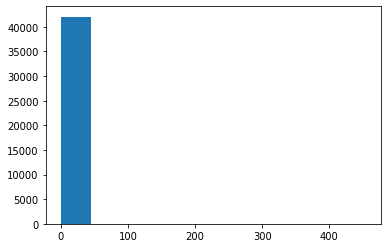

In [0]:
plt.hist(df_task1.total_revenue)

When we take just 5 countries we cover more than 80%
 devices.



In [0]:
df_task1.country.value_counts(normalize=True)

US    0.624929
GB    0.082541
CA    0.066218
AU    0.033881
RU    0.024449
        ...   
MR    0.000024
AI    0.000024
MN    0.000024
EU    0.000024
SC    0.000024
Name: country, Length: 161, dtype: float64

In [0]:
df_task1_f = df_task1[df_task1["country"].isin(["US", "GB", "CA", "AU", "RU"])]

In [0]:
for country in df_task1_f.country.unique():
  print ("Mode of " + str(country) + " is " + str(st.mode(df_task1_f[df_task1.country==country].total_revenue)))

Mode of US is 0.0
Mode of AU is 0.0
Mode of RU is 0.0
Mode of GB is 0.0
Mode of CA is 0.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


We neet to be carreful when looking at stats - mode for PW (Palau?) was 52.55. Impressive?
Not really when you check that there was just one device (but with quite high revenue)
It's one of the reasons I decided to work on filtered list of countries.

In [0]:
df_task1[df_task1.country=='PW'].head()

,device_id,device_install_date,country,total_revenue,month
7383,A1C48062-29C2-4A16-8B08-C38220DEF283,2019-09-22,PW,52.55,9


First and most obvious  - in this dataset devices mostly come from US. Those devices also bring highest revenue (looking at average) but has the highest standard deviaton - it simply shows largest revenue range (you can see that also when looking at maximum values for countries). When we look at mode for those 5 countries it's 0 as the most common value is 0.

In [0]:
print (df_task1_f.groupby('country').describe().unstack(1))

                      country
total_revenue  count  AU          1426.0
                      CA          2787.0
                      GB          3474.0
                      RU          1029.0
                      US         26302.0
                                  ...   
month          max    AU            12.0
                      CA            12.0
                      GB            12.0
                      RU            12.0
                      US            12.0
Length: 80, dtype: float64


**What do we get from this simply descriptive statistics?** 

We know our main markets and how revenue is distributed. Majority of devices didn't bring us any revenue (mean value isn't the best choice to describe our situation), but there are some nice results worth further investigation.<br>

**What could we do else?** <br>
Do timeseries analysis - check if there are trends in time/ seasonality. <br>
If we have number of transactions in time we could check what brings income - many small purchases or less but bigger? <br>
If have dates of transaction if people install just before purchase or install and do shopping later? <br>
What is churn rate? How quickly people de-install? I'm just wondering if there is a group of people who install before bigger purchase and de-install immediately after. If so, how to keep them? <br>
Check how much we had to invest on the market to achive that revenue. <br>


**Part #3 - Revenue calculation exercise (Excel)<br>**
A) our average year 1 revenue per user for <br>



In [21]:
df_task2 = pd.read_csv('task2.csv', parse_dates=['installedon', 'ordersfrom'])
df_task2.index = pd.to_datetime(df_task2['installedon'],format='%y-%m-%d')
df_task2.head()

,installedon,installcount,uninstallcount,ordersfrom,totalusersconverted,ordersfromweek,avgperinst,thisweekusersconverted,usrperc,totalrevenue
installedon,,,,,,,,,,
2019-02-22,2019-02-22,245,72,2019-02-18,32,1,0.0809,9,0.036735,234.05
2019-02-22,2019-02-22,245,72,2019-02-25,32,2,0.0199,3,0.012245,234.05
2019-02-22,2019-02-22,245,72,2019-03-04,32,3,0.0514,4,0.016327,234.05
2019-02-22,2019-02-22,245,72,2019-03-11,32,4,0.0080,3,0.012245,234.05
2019-02-22,2019-02-22,245,72,2019-03-18,32,5,0.0284,2,0.008163,234.05


ARPU  = total revenue/ total number of users <br>
But first we need to group data by days and take just one value per day (to not duplicate revenues)

In [23]:
grouped_day = df_task2[['installedon', 'totalrevenue','installcount' ]].groupby(pd.Grouper(freq='D')).max()
grouped_day.head()

,installedon,totalrevenue,installcount
installedon,,,
2019-02-22,2019-02-22,234.05,245.0
2019-02-23,2019-02-23,446.82,338.0
2019-02-24,2019-02-24,473.71,404.0
2019-02-25,2019-02-25,295.39,386.0
2019-02-26,2019-02-26,956.65,464.0


We have exactly one year installation data history so average 1 year per user revenue is **0.63**

In [24]:
grouped_day.totalrevenue.sum()/ grouped_day.installcount.sum()

0.6324736329981769

B) our average revenue per user over time, indicating whether this has changed over time <br>
Starting from aggregating and summing to see data monthly plus calculating revenue by install count

In [10]:
grouped_day = df_task2[['installedon', 'totalrevenue','installcount' ]].groupby(pd.Grouper(freq='D')).max()
grouped_month = grouped_day[['installedon', 'totalrevenue','installcount' ]].groupby(pd.Grouper(freq='M')).sum()
grouped_month['rev_by_count'] = grouped_month.totalrevenue / grouped_month.installcount
grouped_month.head()

,totalrevenue,installcount,rev_by_count
installedon,,,
2019-02-28,3182.06,2613.0,1.217780
2019-03-31,15071.15,11178.0,1.348287
2019-04-30,6425.78,7928.0,0.810517
2019-05-31,5791.83,7111.0,0.814489
2019-06-30,3794.27,7000.0,0.542039


Very simple data visualisation

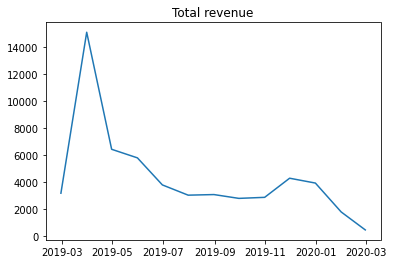

In [18]:
plt.plot(grouped_month.totalrevenue)
plt.title('Total revenue')
plt.show()

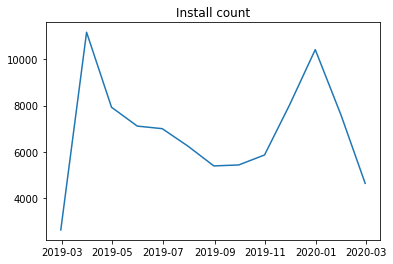

In [16]:
plt.plot(grouped_month.installcount)
plt.title('Install count')
plt.show()

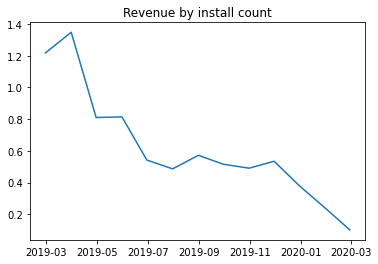

In [17]:
plt.plot(grouped_month.rev_by_count)
plt.title('Revenue by install count')
plt.show()

I was also thinkig about *uninstallcount* but I don't think we should delete this group from *installcount* because I just don't know how long they used Cently or if they order something. Definitely we should not exclude those who ordered from install count. <br>
However my concern is if we don't count some devices multiple times (those who installed, unistalled and installed again) so I would make sure that we count unique device id when we look at *installcount*. <br>
My second concern is if I should't look at *ordersfromweek* related data but I just hope it's there to mess and make this task slightly more difficult (as it required aggregating data to days).